In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing

In [104]:
cebuano_dataset = pd.read_csv('/content/drive/MyDrive/Cebuano Dataset/v3/Cebuano_Linguistic_Features_TRAD_SYLL_v3.csv') 

In [105]:
print('Shape of Features', cebuano_dataset.shape)
cebuano_dataset.head(5)

Shape of Features (284, 16)


,book_title,consonant_cluster_density,v_density,cv_density,vc_density,cvc_density,ccv_density,ccvc_density,unique_words,word_count,sentence_count,average_word_len,average_sentence_len,average_syllable_count,polysyll_count,label
0,1 Ang mga Prutas Gisuwat ni: Elvira J. Buot ...,0.410714,1.714286,1.267857,1.250000,0.571429,0.267857,0.178571,31,56,9,4.446429,6.222222,1.875000,0,1
1,1 Ang Monyeka Gisuwat ni: Milagros Meca ...,0.303571,2.196429,1.696429,1.553571,0.821429,0.160714,0.125000,37,56,10,5.178571,5.600000,2.357143,1,1
2,1 Ang Ok-ok Gisuwat ni: Juna J. Presbite...,0.342857,1.628571,1.171429,1.057143,0.485714,0.200000,0.085714,29,35,7,4.342857,5.000000,1.914286,0,1
3,1 Ang Panimalay Gisuwat ni: Cecilia Y. W...,0.400000,2.353846,1.876923,1.892308,1.030769,0.261538,0.200000,50,65,17,5.769231,3.823529,2.476923,3,1
4,1 Ang Pati ni Pipo Sinulat nila ni: Rosemarie ...,0.304762,1.733333,1.266667,1.085714,0.476190,0.209524,0.114286,62,105,17,4.238095,6.176471,1.876190,1,1


In [106]:
c = cebuano_dataset['label']
X = cebuano_dataset.drop('label', axis=1)
X = X.drop('book_title', axis=1)

X.head()

,consonant_cluster_density,v_density,cv_density,vc_density,cvc_density,ccv_density,ccvc_density,unique_words,word_count,sentence_count,average_word_len,average_sentence_len,average_syllable_count,polysyll_count
0,0.410714,1.714286,1.267857,1.250000,0.571429,0.267857,0.178571,31,56,9,4.446429,6.222222,1.875000,0
1,0.303571,2.196429,1.696429,1.553571,0.821429,0.160714,0.125000,37,56,10,5.178571,5.600000,2.357143,1
2,0.342857,1.628571,1.171429,1.057143,0.485714,0.200000,0.085714,29,35,7,4.342857,5.000000,1.914286,0
3,0.400000,2.353846,1.876923,1.892308,1.030769,0.261538,0.200000,50,65,17,5.769231,3.823529,2.476923,3
4,0.304762,1.733333,1.266667,1.085714,0.476190,0.209524,0.114286,62,105,17,4.238095,6.176471,1.876190,1


## Training and Testing Sets

In [107]:
from sklearn.model_selection import train_test_split
X = cebuano_dataset[['consonant_cluster_density','v_density','cv_density','vc_density','cvc_density','ccv_density','ccvc_density','unique_words','word_count','sentence_count','average_word_len','average_sentence_len','average_syllable_count','polysyll_count']]
y = cebuano_dataset[['label']] 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [109]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=20)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=20)

In [110]:
y_pred=clf.predict(X_test)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=3))

[[20  2  0]
 [ 2 12  5]
 [ 0  1 15]]
              precision    recall  f1-score   support

           1      0.909     0.909     0.909        22
           2      0.800     0.632     0.706        19
           3      0.750     0.938     0.833        16

    accuracy                          0.825        57
   macro avg      0.820     0.826     0.816        57
weighted avg      0.828     0.825     0.820        57



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


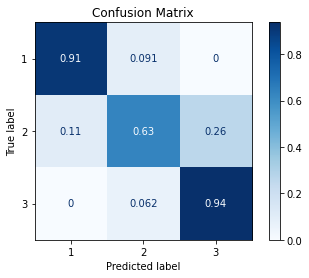

In [112]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

## Random Forest Hyperparmeter Tuning using GridSearchCV

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

rfc_model= RandomForestClassifier()

parameters = {'n_estimators': [10,100,1000], 
              'max_features': [6,32,'auto'], 
              'max_depth': [10,20,40],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(RandomForestClassifier(), parameters, scoring= 'accuracy', refit = 'True', cv = 5)
grid_search = grid_search.fit(X_train, y_train)

print("Best parameters:")
print(grid_search.best_params_)
rfc_best_params_= grid_search.best_params_

rfc_model.set_params(**grid_search.best_params_)
rfc_model.fit(X_train, y_train)

predictions = rfc_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best parameters:
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'n_estimators': 100}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [92]:
grid_search = grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, grid_search, digits=3))

[[19  5  0]
 [ 4 11  6]
 [ 0  4  8]]
              precision    recall  f1-score   support

           1      0.826     0.792     0.809        24
           2      0.529     0.429     0.474        21
           3      0.471     0.667     0.552        12

    accuracy                          0.632        57
   macro avg      0.609     0.629     0.611        57
weighted avg      0.642     0.632     0.631        57



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


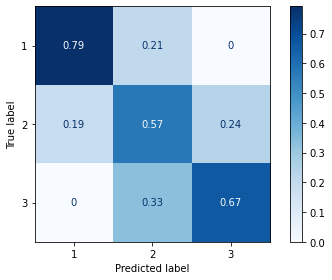

In [93]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(rfc_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

##Feature Importance 

In [94]:
pip install eli5

In [95]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=14,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [96]:
from sklearn.ensemble import RandomForestClassifier

feature_names = ['consonant_cluster','v_density','cv_density','vc_density','cvc_density','ccv_density','ccvc_density','unique_words','word_count','sentence_count','average_word_len','average_sentence_len','average_syllable_count','polysyll_count']
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [97]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.021 seconds


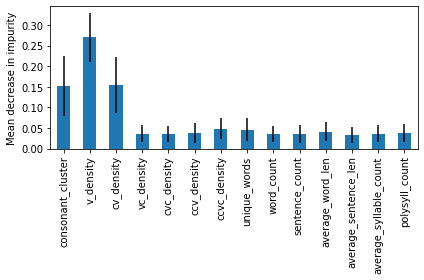

In [98]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# plt.savefig("feature_importance_MDI_80.pdf", dpi=80, format='pdf')

In [99]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 4.044 seconds


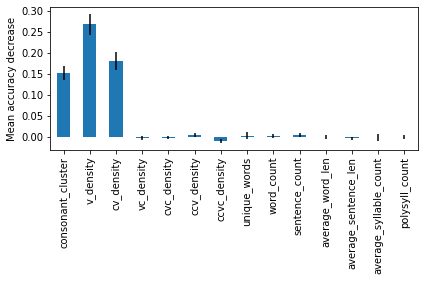

In [100]:
import pandas as pd

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

plt.savefig("feature_importance_permutation_80.pdf", dpi=80, format='pdf')